In [1]:
import ils.dirichletMixtures as dm
import ils.agglomerativeClustering as hc
import ils.utils as ut
import ils.cfsdp as cfs
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import random

In [2]:
ag_data = pd.read_csv("dataset/Ag_features_normalised.csv")
ag_data = ag_data[['popFCC', 'popHCP', 'popICOS', 'SCN3', 'SCN4', 'SCN5', 
'SCN6', 'SCN7', 'SCN8', 'SCN9', 'SCN10', 'popSurface', 'coordNumberNormalised']]
nd_data = pd.read_csv('dataset/ND_finalClusters.csv')
nd_data = nd_data[['H_conc', 'HCP_conc', 'FCC_conc', 'F_111', 'F_110', 'F_100',
       'Sphericity', 'CC_coord', 'sp1', 'sp2', 'sp2x', 'sp3', 'dCC', 'dCCe',
       'aCCC', 'aCCCe', 'D_nm']]
X = ut.synthetic_data()

In [3]:
X_embedded = nd_data.copy()
X_embedded = TSNE(n_components=2, perplexity=30, random_state=42, verbose=1).fit_transform(X_embedded)
X_embedded = pd.DataFrame(X_embedded, columns = ['x', 'y'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.000s...
[t-SNE] Computed neighbors for 500 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.267793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.400772
[t-SNE] KL divergence after 1000 iterations: 0.221010


In [4]:
def test_hc(dataset, k, X_embedded, low=60, high=95):
    Z = hc.get_linkage(dataset, method='single', metric='euclidean')
    label = hc.choose_best_cut(Z, k, low=low, high=high)
    ac, remain = hc.split_data(label, k)
    index = []
    for i in range(len(ac)):
        index.append(random.choice(ac[i]))
    print(index)
    newL, count = cfs.applyILS(dataset, index)
    cfs.draw_ILS(count, X_embedded, newL, ut.colors)
    cfs.plot_centroid(X_embedded, index)

100.0
100.0
100.0
100.0
100.0
68.2
68.2
100.0
100.0
100.0
Cut height: 0.9
Top 2 label data is of 68.2%
[1013, 1376]
The number of clusters: 2
Iterative label spreading took 7.8s to label 1500 points


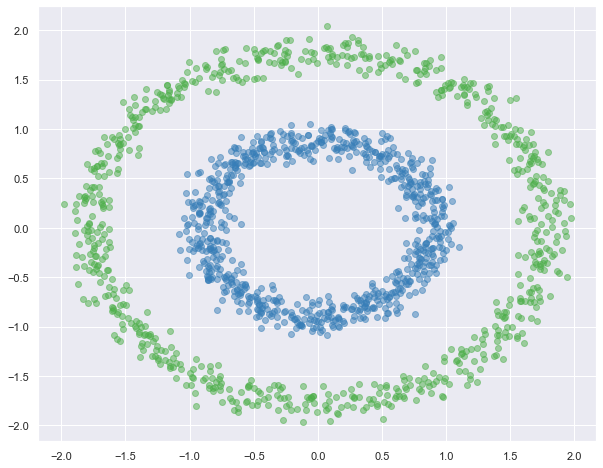

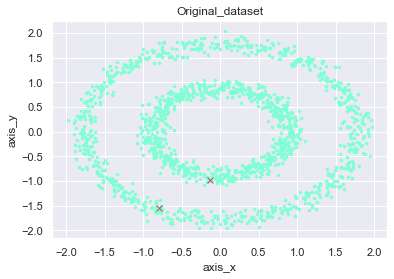

In [5]:
test_hc(X[0], 2, X[0])

100.0
100.0
100.0
100.0
100.0
100.0
99.0
99.0
100.0
100.0
100.0
Cut height: 0.9
Top 2 label data is of 99.0%
[39, 895]
The number of clusters: 2
Iterative label spreading took 7.8s to label 1500 points


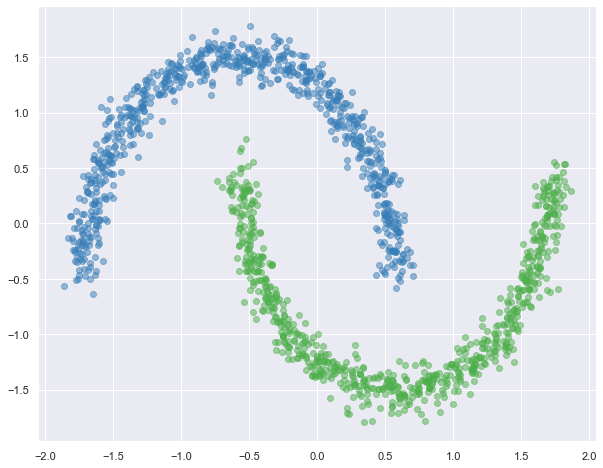

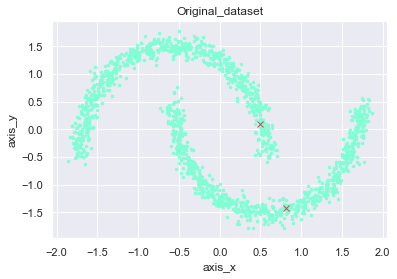

In [6]:
test_hc(X[1], 2, X[1], high=99.1)

99.06666666666666
99.8
98.6
100.0
98.53333333333333
99.8
78.60000000000001
78.60000000000001
97.86666666666667
99.2
99.93333333333332
Cut height: 0.9
Top 3 label data is of 78.60000000000001%
[963, 1421, 68]
The number of clusters: 3
Iterative label spreading took 8.0s to label 1500 points


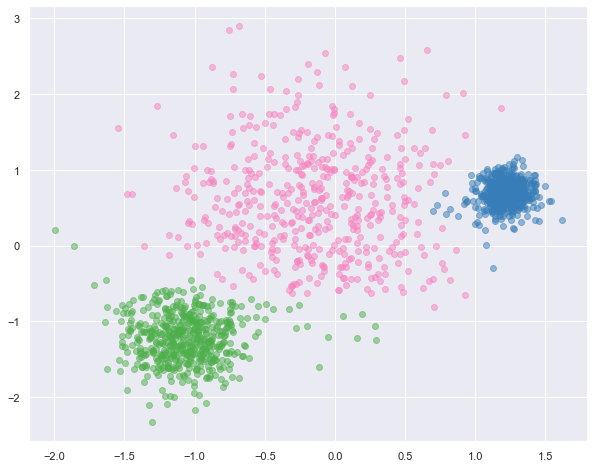

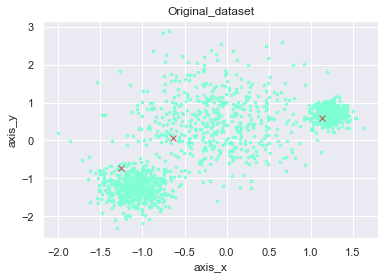

In [7]:
test_hc(X[2], 3, X[2])

99.93333333333332
100.0
99.93333333333332
100.0
99.93333333333332
100.0
94.19999999999999
94.19999999999999
99.86666666666667
99.93333333333332
100.0
100.0
Cut height: 0.9
Top 3 label data is of 94.19999999999999%
[1022, 689, 190]
The number of clusters: 3
Iterative label spreading took 7.9s to label 1500 points


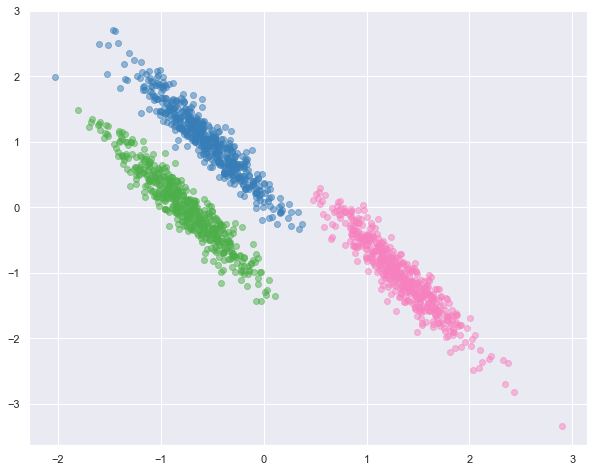

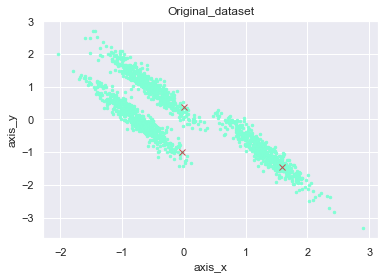

In [8]:
test_hc(X[3], 3, X[3])

100.0
100.0
100.0
100.0
100.0
100.0
98.33333333333333
98.33333333333333
99.8
100.0
100.0
100.0
100.0
Cut height: 0.9
Top 3 label data is of 98.33333333333333%
[589, 178, 1258]
The number of clusters: 3
Iterative label spreading took 8.0s to label 1500 points


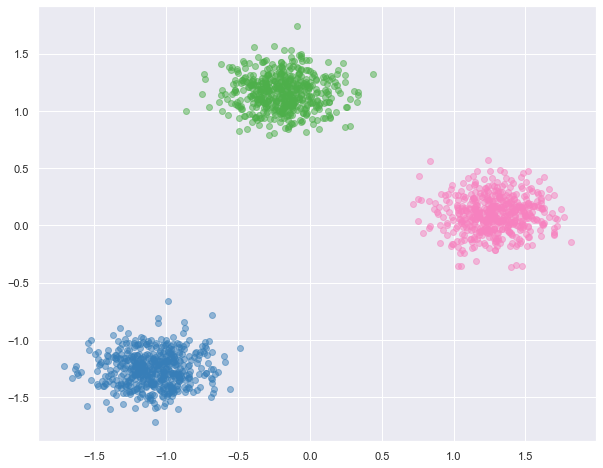

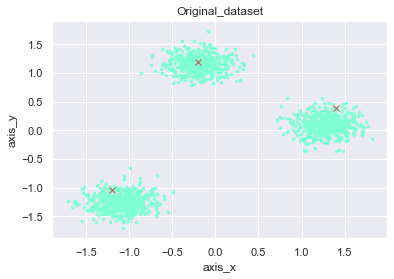

In [10]:
test_hc(X[4], 3, X[4], high=99)

Number of components:  13


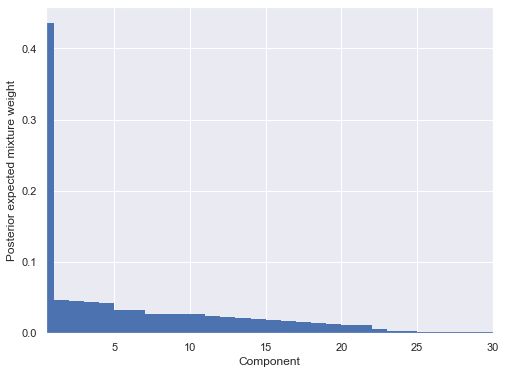

In [ ]:
dm.plot_mixtures(30, nd_data, 0.8)

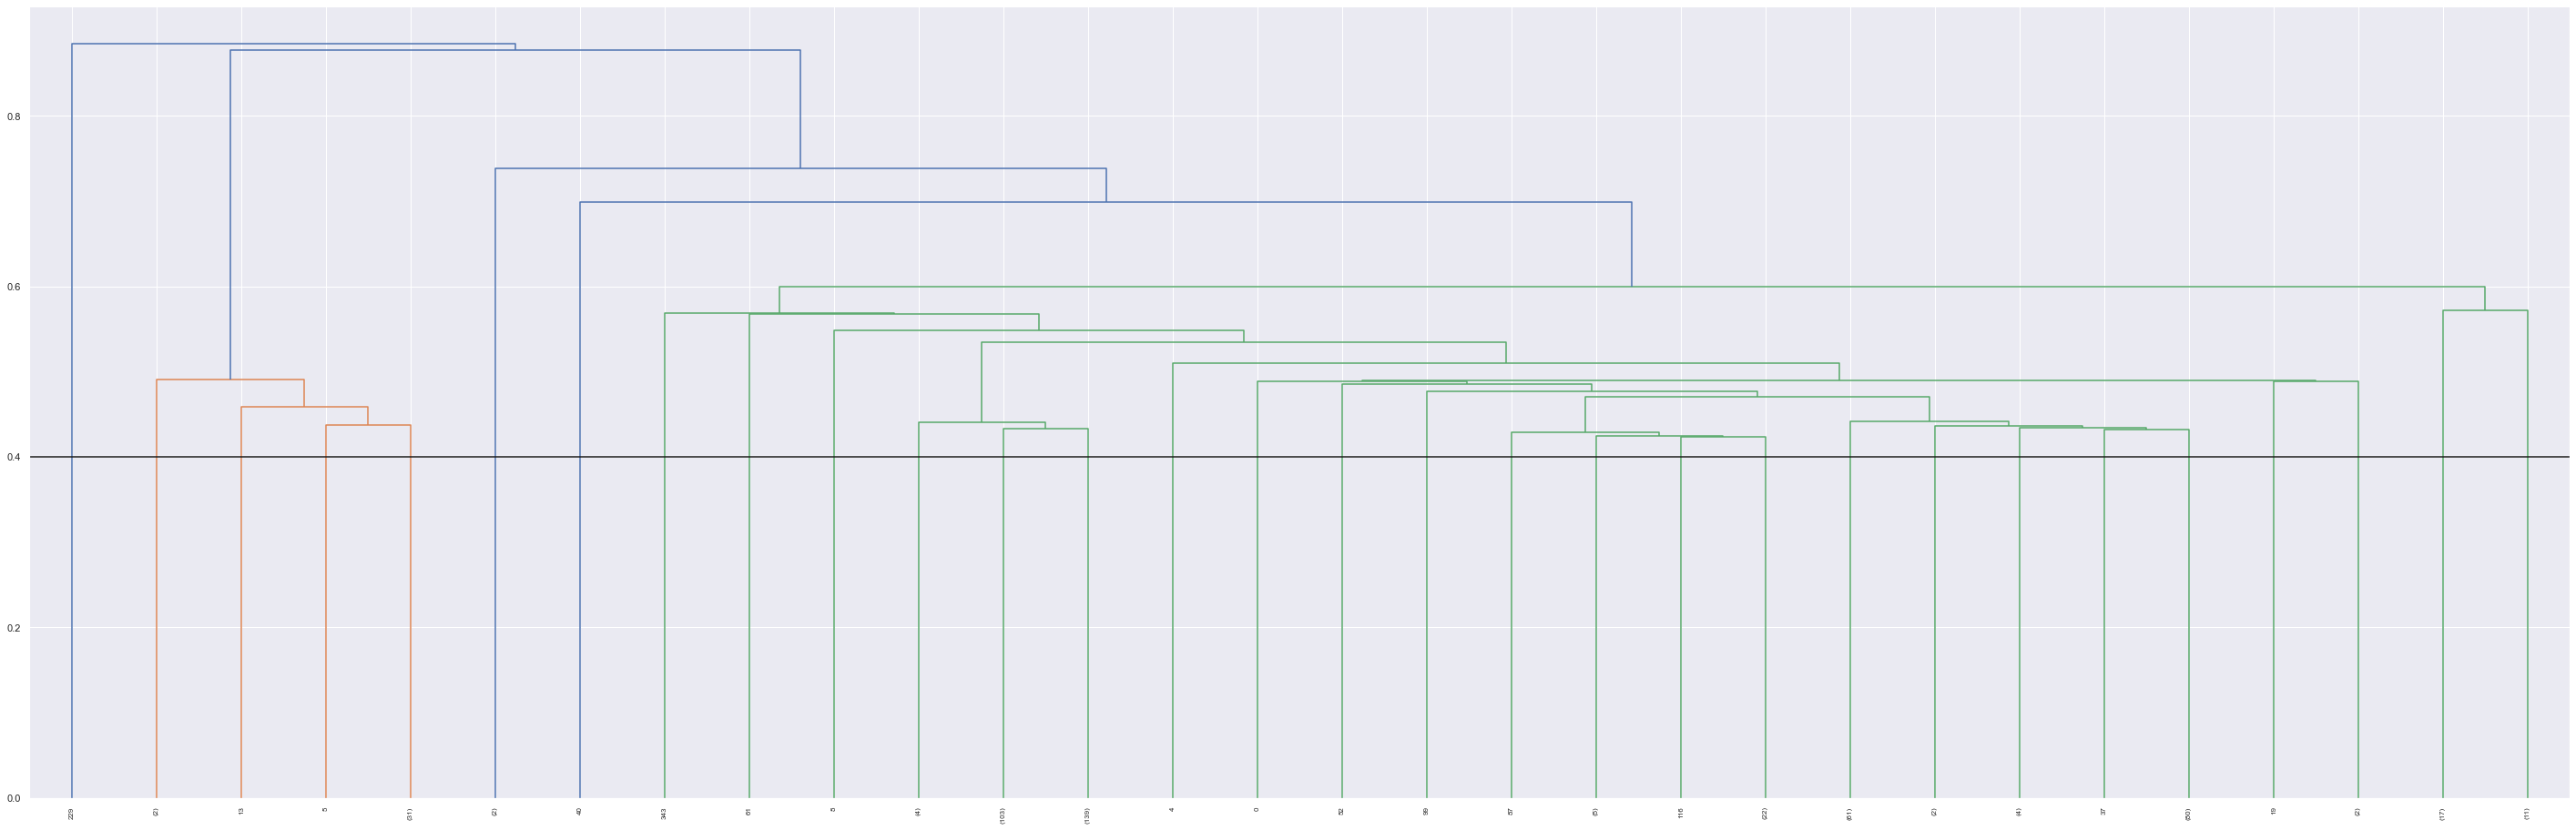

In [ ]:
Z = hc.get_linkage(nd_data)
hc.plot_dendrogram(Z, nd_data, 0.4)

In [ ]:
label = hc.cut_height(Z, 0.4)
labels = hc.calculate_topklabel(label, 8)

Top 8 label data is of 87.0%


In [ ]:
ac, remain = hc.split_data(label, 8)
index = []
for i in range(len(ac)):
    index.append(random.choice(ac[i]))
index

[415, 253, 400, 299, 188, 58, 153, 114]

The number of clusters: 8
Iterative label spreading took 1.6s to label 500 points


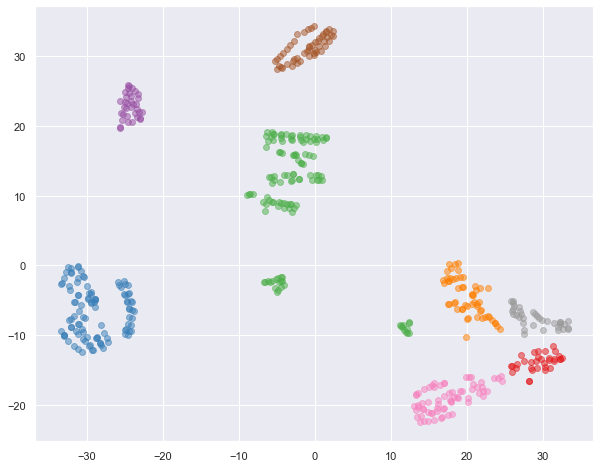

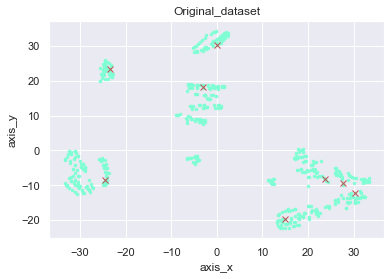

In [ ]:
newL, count = cfs.applyILS(nd_data, index)
cfs.draw_ILS(count, X_embedded, newL, ut.colors)
cfs.plot_centroid(X_embedded, index)

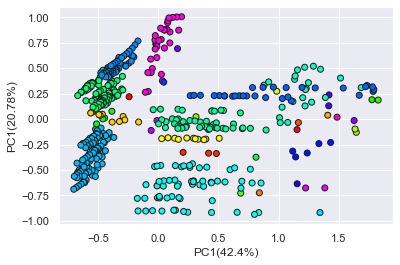

In [ ]:
hc.pca_vision(nd_data, 0.95, label)